# 0. Intro

In [1]:
from fastai.vision.all import *

## 데이터 저장

* 옆에 폴더에 보면 저장된 데이터들을 확인해볼 수 있다!
* 안보이는 파일들은 리눅스처럼 숨겨진 파일들을 의미한다.
 

In [2]:
untar_data(URLs.PETS)/'images'

Path('/root/.fastai/data/oxford-iiit-pet/images')

* 위의 결과를 보면 해당 경로에 이미지를 저장한 것이다!
* 즉, 위의 명령은 URL에서 데이터를 불러오고 해당경로에 데이터를 저장

In [3]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

* 해당 경로를 복사하고 붙여 넣으면 자동으로 다운되는 것이 있는데 `untar_data`은 압축파일을 해제 후 `images` 폴더에 저장된다.

* 경로로 가보면 압축이 해제되고 이미지 파일이 저장된 것을 볼 수 있으나 열어볼 수는 없음.....
* 보고싶다면 아래와 같은 method를 이용하자

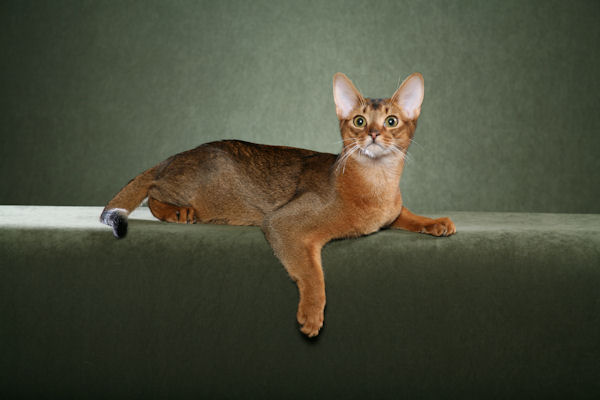

In [4]:
PILImage.create('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_1.jpg')

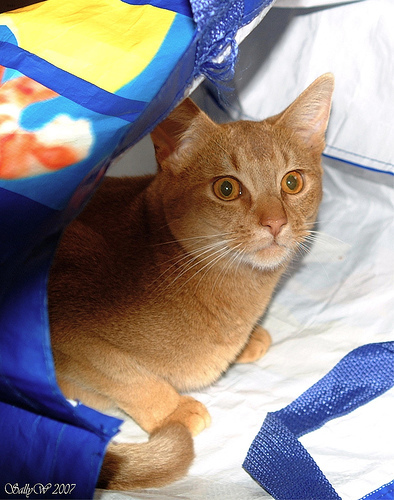

In [5]:
PILImage.create('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_100.jpg')

* 위 같은 과정이 그렇게 편하진 않은 것 같다.

`-` 조금 더 쉬운 방법
  * 파일들 이름의 리스트로 저장한다면?

In [6]:
path = Path('/root/.fastai/data/oxford-iiit-pet/images')

In [7]:
files = get_image_files(path)

In [8]:
files[0]

Path('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_9.jpg')

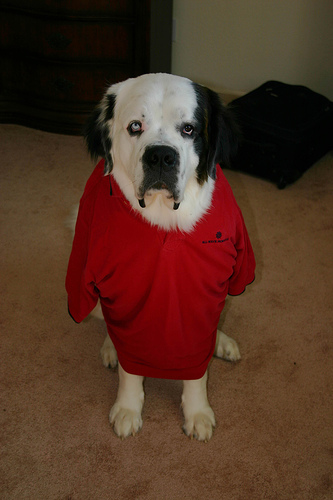

In [9]:
PILImage.create('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_134.jpg')

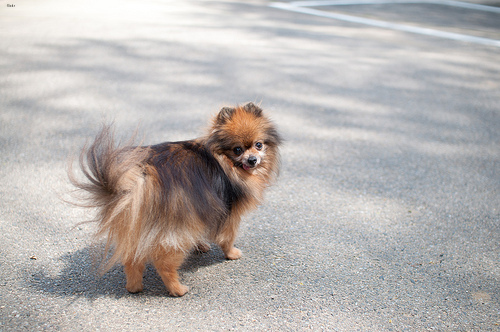

In [10]:
PILImage.create(files[0])

/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_187.jpg


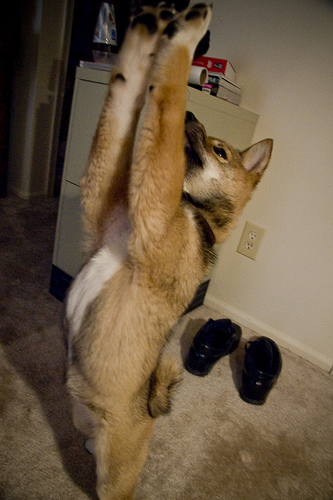

In [11]:
print(files[2])
PILImage.create(files[2])

`-` 해당 데이터는 앞글자가 대문자면 고양이, 소문자면 강아지이다.

`-` 특1 : 앞글자가 대문자면 `고양이`, 소문자면 `강아지` $\to$ 창의적인 방법임

`-` 특2 : 이미지크기가 서로 다르다...

`-` 특징 1을 이용해서 한번 강아지와 고양이를 분류해보자

## Class 분류 함수 구현

In [12]:
def label_func(fname) :
    if fname[0].isupper() :
      return "cat"
    else : 
      return "dog"

In [13]:
label_func("Egyptian_Mau_120.jpg")

'cat'

In [14]:
label_func("egyptian_Mau_120.jpg")

'dog'

In [15]:
dls = ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(224))

* `path` 경로에서 `files`에 해당하는 파일들을 불러와서 $X$를 만들고 정의한 함수 `label_func`를 적용해 `item_tfms`에 정의된 방식으로 $X$를 변환하여 저장한다. 

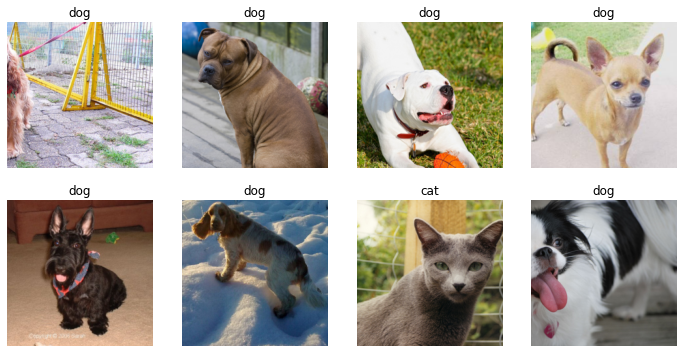

In [16]:
dls.show_batch(max_n=8) ## 8개의 그림만보자

### cnn_learner 

`-` 1차 목표 : 이미지 파일을 받으면 -> 개인지 고양이인지 판단하는 모형을 만들자

`-` 2차 목표 : 그 모형에 새로운 이미지 파일을 전달하여 이미지를 분류할 것이다.

`-` cnn_learner 라는 함수를 이용해서 1차 목표와 2차목표를 달성할 `object`를 만들것임.



In [17]:
clsfr = cnn_learner(dls,resnet34, metrics = error_rate)

/usr/local/lib/python3.8/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

`-` clsfr 필요한 정보 : 우리가 넣어줘야하는 것들이 대부분
  
  * 모델정보 : 어떠한 분류기를 사용할 것인가
  
  * 데이터
  
  * 평가기준표 : 채점을 할지표

`-` clsfr에  필요한 동작 : 이미 구현이 되어있는 것들을 사용

  * 학습
  * 결과
  * 예측


`-` cpu를 써서 학습을 하니 너무 오래 걸리니 `런타임` 유형을 gpu로 바꿔서 하자

In [18]:
clsfr.fine_tune(1) # 한번 학습

epoch,train_loss,valid_loss,error_rate,time
0,0.149759,0.025045,0.006766,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.049579,0.015034,0.004060,00:10


#### train error

`-` 첫 번째 원소는 고양이일 확률, 두 번째 원소는 강아지일 확률
`-` TensorBase : 고양이면 `1`. 강아지면 `0`

In [19]:
clsfr.predict(files[0])

('dog', TensorBase(1), TensorBase([1.0673e-07, 1.0000e+00]))

In [20]:
clsfr.predict(files[7])

('cat', TensorBase(0), TensorBase([9.9998e-01, 1.7946e-05]))

`-` 랜덤으로 예측결과를 살펴보자

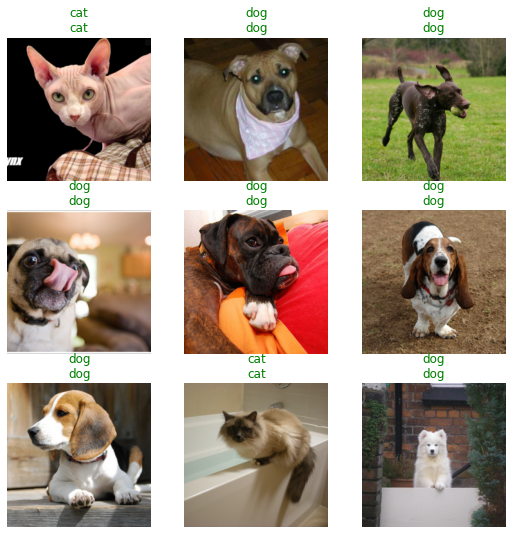

In [21]:
clsfr.show_results()

##### 오답분석

`-` 오답을 분석하는 오브젝트를 만들고 그 안에 학습한 `clsfr`을 집어넣자.

In [22]:
interpreter = Interpretation.from_learner(clsfr) 

`-` 오답중 `loss`가 큰 상위 9개만 살펴보자

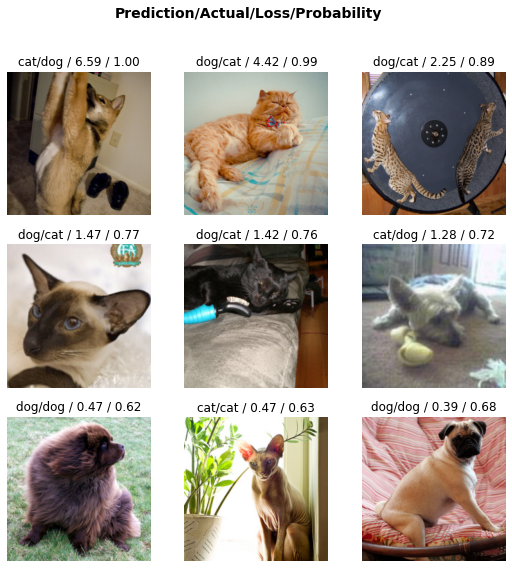

In [23]:
interpreter.plot_top_losses(9)

`-` 근데 모형이 과적합되어서 학습한거면?? $\to$ 약간 가슴깊이 의구심이 든다.

#### test error

In [40]:
test_file = get_image_files('/content')

In [41]:
test_file

(#10) [Path('/content/pexels-fabian-köhler-14652203.jpg'),Path('/content/pexels-brett-sayles-15075137.jpg'),Path('/content/pexels-pixabay-57416.jpg'),Path('/content/pexels-vadim-b-127028.jpg'),Path('/content/pexels-peng-louis-1643457.jpg'),Path('/content/pexels-poodles-doodles-1458926.jpg'),Path('/content/pexels-pixabay-416160.jpg'),Path('/content/pexels-pixabay-45201.jpg'),Path('/content/pexels-poodles-doodles-1458914.jpg'),Path('/content/pexels-batitay-japheth-14308789.jpg')]

In [42]:
PILImage.create(test_file[0])

Output hidden; open in https://colab.research.google.com to view.

In [54]:
test_file

(#10) [Path('/content/pexels-fabian-köhler-14652203.jpg'),Path('/content/pexels-brett-sayles-15075137.jpg'),Path('/content/pexels-pixabay-57416.jpg'),Path('/content/pexels-vadim-b-127028.jpg'),Path('/content/pexels-peng-louis-1643457.jpg'),Path('/content/pexels-poodles-doodles-1458926.jpg'),Path('/content/pexels-pixabay-416160.jpg'),Path('/content/pexels-pixabay-45201.jpg'),Path('/content/pexels-poodles-doodles-1458914.jpg'),Path('/content/pexels-batitay-japheth-14308789.jpg')]

In [56]:
PILImage.create(test_file[6])

Output hidden; open in https://colab.research.google.com to view.

In [48]:
clsfr.predict(test_file[0])

('dog', TensorBase(1), TensorBase([5.4642e-05, 9.9995e-01]))

In [57]:
clsfr.predict(test_file[6])

('cat', TensorBase(0), TensorBase([9.9993e-01, 6.6712e-05]))

`-` 뭐 어느정도는? test 데이터에 대해서도 잘 분류를 하는것 같다!

# reference

[1] [STML2022](https://guebin.github.io/STML2022/posts/I.%20Overview/2022-09-07-1wk.html)

[2] fastai와 Pytorch가 만나서 꽃피우는 딥러닝